# OCR Struk Belanja & Saran Belanjaan
## Receipt OCR & Product Recommendations

# Rekomendasi Produk Termurah di Lokasi Terdekat
<hr></hr>
<ul>
  <li>Project Name : Takasimura</li>
  <li>Team ID : C242-PR589</li>
</ul>
<hr></hr>
<h3>      Machine Learning Team Member</h3>

| Student ID   | Name                     | University                         |
|--------------|--------------------------|------------------------------------|
| M318B4KY0501 | Andi Muh.Rakha Makkawaru | Universitas Sultan Ageng Tirtayasa |
| M200B4KY2787 | Muhammad Dzaki Al Aqsha  | Universitas Diponegoro             |

## Project Description:

This project aims to develop a system that leverages computer vision, natural language processing, and machine learning techniques to analyze physical receipts and provide personalized product recommendations. By processing images of receipts, extracting relevant information, and applying recommendation algorithms, the system can suggest similar products at lower prices and closer locations to the user's current location.

##1. Importing Dependencies

In [1]:
repo_url = "https://github.com/dzakialaqsha/OCR-Struk-Belanja.git"

!git clone {repo_url}

Cloning into 'OCR-Struk-Belanja'...
remote: Enumerating objects: 1734, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 1734 (delta 87), reused 11 (delta 2), pack-reused 1521 (from 1)
Receiving objects: 100% (1734/1734), 160.38 MiB | 11.98 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Updating files: 100% (1438/1438), done.


In [2]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.3 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:5 http://arc

In [3]:
!pip3 install --upgrade --user google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 47.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
!pip install vertexai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 60.5 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.74.0
    Uninstalling google-cloud-aiplatform-1.74.0:
      Successfully uninstalled google-cloud-aiplatform-1.74.0


In [5]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import urllib.request

from matplotlib import pyplot as plt
import pytesseract

import pandas as pd
from datetime import datetime
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import vertexai
from vertexai.preview.generative_models import GenerativeModel

from google.auth.transport.requests import Request
from google.oauth2.service_account import Credentials

import requests
import json
import re
import os

In [6]:
#import utility functions from repo
%cd "/content/OCR-Struk-Belanja/Object Detection/utils"
import object_localization as ol
import vertex_extract_dict as ved

/content/OCR-Struk-Belanja/Object Detection/utils


In [7]:
#import utility functions from repo
%cd "/content/OCR-Struk-Belanja/recommender/utils"
import product_recommender as pr
import cheap_close as cc

/content/OCR-Struk-Belanja/recommender/utils


In [8]:
#import utility functions from repo
%cd "/content/OCR-Struk-Belanja"
import full_deployment as fd

/content/OCR-Struk-Belanja


# 2. Defining Test Variables

In [9]:
model = tf.keras.models.load_model("./Object Detection/Saved Models/model.keras")

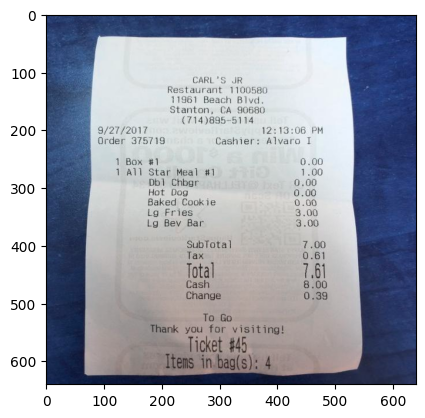

In [10]:
key_path = "/content/capstone-bangkit-d0ca4-f079200442c4.json"
test_path = "/content/OCR-Struk-Belanja/Object Detection/obj/100_jpg.rf.c788257ba5f3206ce8d9f20e2afe5bed.jpg"

dataset_path = "/content/OCR-Struk-Belanja/recommender/dataset/purchase_history.csv"

plt.imshow(cv.imread(test_path), cmap = "gray")
plt.show()

test_uid = "evek1lrur3le1s8rcqie8r6auwqj"
test_email = "evek11rur@gmail.com"

test_long = 110.435528
test_lat = -0.774317

## 3. Full Deployment

In [11]:
fd.full_deployment( #if fail, it retries vertex api call 3 times,since it is a bit random due to llm inconsistencies
    key_path = key_path,
    test_path = test_path,
    dataset_path = dataset_path,
    uid = test_uid,
    email = test_email,
    model = model,
    lon = test_long,
    lat = test_lat
)

Geocoding failed: REQUEST_DENIED


,product_name,product_type,purchase_price,purchase_date,purchase_address,long,lat,distance
123,GD GCPN 250ML,minuman manis,7700.0,2024-08-13,NaN,110.435929,-0.774191,0.046715
136,ICHITAN MLK BRWN 300,minuman manis,9900.0,2024-01-26,NaN,110.435874,-0.774022,0.050545
216,INDF IC RB RD VLT55,makanan pokok,4500.0,2024-01-20,NaN,110.435317,-0.774721,0.050731
285,CHUPA BELT 8G,makanan manis,3000.0,2024-01-21,NaN,110.435882,-0.773813,0.068556
428,INDF IC RB RD VLT55,makanan pokok,4500.0,2024-09-16,NaN,110.435056,-0.773906,0.069592
...,...,...,...,...,...,...,...,...
421,FOREST PCH480ML,minuman manis,9300.0,2024-06-24,NaN,110.434523,-0.772045,0.276198
164,INDF IC RB RD VLT55,makanan pokok,4500.0,2024-08-16,NaN,110.435555,-0.771816,0.278096
59,INDF IC RB RD VLT55,makanan pokok,4500.0,2024-03-02,NaN,110.436481,-0.771990,0.279558
176,INDF IC RB RD VLT55,makanan pokok,4500.0,2024-06-16,NaN,110.437306,-0.772519,0.281168
